In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import matplotlib.dates as mdates

%matplotlib inline

In [38]:
flight = 1

In [39]:
basedir = 'data/P3_2017/LGS'
infile = 'OIB_P3_F200' + str(flight) + '_exportfromGeosoft.csv'
# infile = 'OIB_P3_F2001_exportfromGeosoft.csv'
# infile = 'OIB_P3_F2004_exportfromGeosoft.csv'
df = pd.read_csv(os.path.join(basedir, infile))
df.head()

,Line,AccBiasX,AccBiasY,AccBiasZ,AccBiasZ_mgal,Corrected_Free_Air_DgS,diff_att_noatt,diff_oib_grav4,diff_oib_grav4_70,diff_oib_grav4_70_clip,...,Pitch,Roll,seconds,static_en,static_st,unixtime,UTCDate,x,y,zbias_corr
0,D2001,0.000633,-0.001196,-0.000103,-10.2868,108.571,1.007921,14.151178,14.084874,14.084874,...,-1.095306,0.097764,40597,-18.3,-23.9,1490181397,2017/03/22,-587786.161012,-1.342347e+06,18.613200
1,D2001,0.000637,-0.001183,-0.000108,-10.7741,110.105,1.231149,14.404454,13.962782,13.962782,...,-1.286674,0.097449,40598,-18.3,-23.9,1490181398,2017/03/22,-587790.379637,-1.342345e+06,18.125717
2,D2001,0.000641,-0.001176,-0.000113,-11.2547,110.393,1.342680,14.756877,13.857421,13.857421,...,-1.356420,0.086471,40599,-18.3,-23.9,1490181399,2017/03/22,-587797.003847,-1.342343e+06,17.644933
3,D2001,0.000646,-0.001169,-0.000115,-11.5110,109.255,1.463912,14.869320,13.768654,13.768654,...,-1.356472,0.033724,40600,-18.3,-23.9,1490181400,2017/03/22,-587806.107320,-1.342340e+06,17.388450
4,D2001,0.000652,-0.001164,-0.000119,-11.9362,106.520,1.438000,15.291789,13.696342,13.696342,...,-1.263704,0.001444,40601,-18.3,-23.9,1490181401,2017/03/22,-587817.675328,-1.342336e+06,16.963067


In [40]:
df.keys()

Index(['Line', 'AccBiasX', 'AccBiasY', 'AccBiasZ', 'AccBiasZ_mgal',
       'Corrected_Free_Air_DgS', 'diff_att_noatt', 'diff_oib_grav4',
       'diff_oib_grav4_70', 'diff_oib_grav4_70_clip', 'diff_oib_grav4_70_corr',
       'diff_oib_grav4_clip', 'diff_oib_zbias', 'diff_oib_zbias_clip', 'drift',
       'drift_correction', 'duration', 'Ellipsoidal_height', 'Free_Air_DgS',
       'grav', 'grav4', 'grav4_70', 'grav4_70_st', 'grav_4_70_corr',
       'grav_4_corr', 'H_Ell', 'Heading', 'hms', 'imu_temp_C', 'increment',
       'Latitude', 'Longitude', 'NS', 'oib_10_11_12', 'PDOP', 'Pitch', 'Roll',
       'seconds', 'static_en', 'static_st', 'unixtime', 'UTCDate', 'x', 'y',
       'zbias_corr'],
      dtype='object')

In [41]:
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))

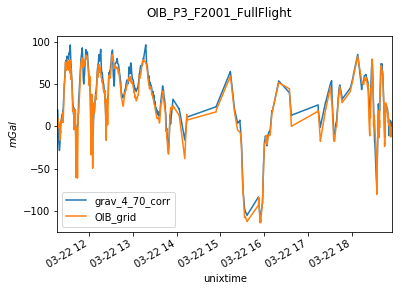

In [42]:
fig, ax = plt.subplots()
ln1 = df['grav_4_70_corr'].plot()
ln2 = df['oib_10_11_12'].plot(label='OIB_grid')
ax.set_ylabel('$mGal$')
plt.legend()
plt.suptitle(infile[:12] + '_FullFlight')
plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB__FullFlight.png')

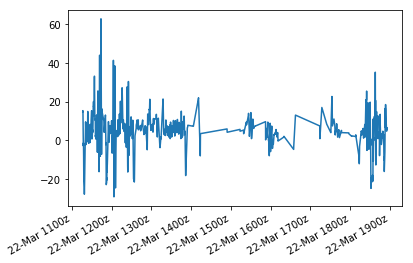

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df['grav_4_70_corr'] - df['oib_10_11_12'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H%Mz'))
fig.autofmt_xdate()

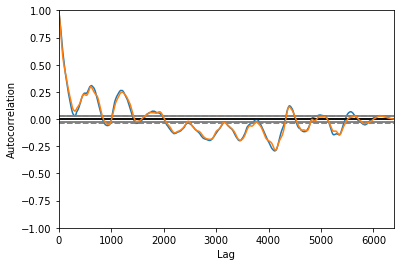

In [44]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['grav4'])
# autocorrelation_plot(df['grav_4_70_corr'])
autocorrelation_plot(df['oib_10_11_12'])
# plt.legend()
plt.show()

Text(0,0.5,'$^{\\circ}C$')

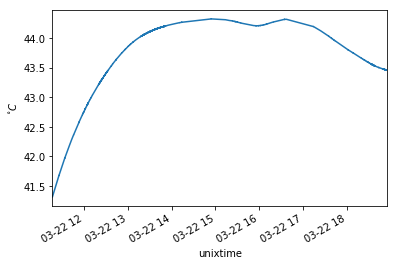

In [45]:
fig, ax = plt.subplots()
df['imu_temp_C'].plot()
ax.set_ylabel('$^{\circ}C$')

In [46]:
if flight == 1:
    # F001
    begin_line = datetime(2017, 3, 22, 13, 18)
    end_line = datetime(2017, 3, 22, 13, 52)
elif flight == 4:
    # F004
    begin_line = datetime(2017, 3, 27, 15, 35)
    end_line = datetime(2017, 3, 27, 16, 50)
else:
    print("no flight")

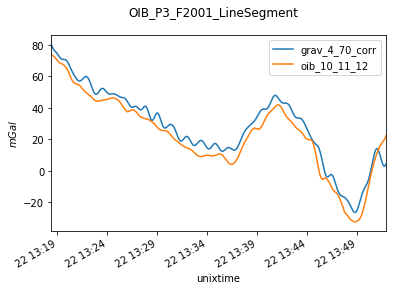

In [47]:
fig, ax = plt.subplots()
# gravity = gravity[(begin_line <= gravity.index) & (gravity.index <= end_line)]
df[['grav_4_70_corr', 'oib_10_11_12']].loc[begin_line: end_line].plot(ax=ax)
ax.set_ylabel('$mGal$')
plt.suptitle(infile[:12] + '_LineSegment')
plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB_LineSegment.png')

In [48]:
df['imar_bias'] = df['grav_4_70_corr'] - df['oib_10_11_12']

Text(0,0.5,'$mGal$')

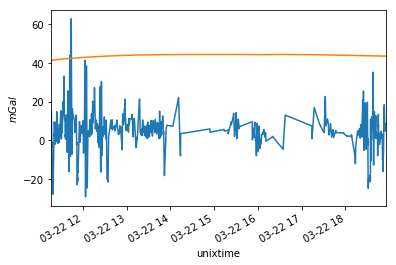

In [49]:
fig, ax = plt.subplots()
# df['imar_bias'].loc[begin_line: end_line].plot()
df['imar_bias'].plot()
df['imu_temp_C'].plot()
ax.set_ylabel('$mGal$')



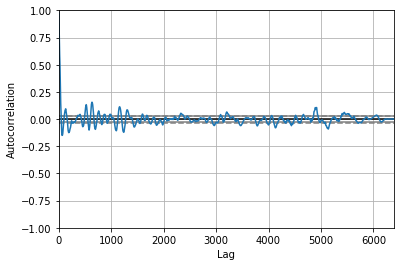

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['imar_bias'])
plt.show()

## LOWESS
Need to adjust "frac" in the lowess module to get a compatible, linear relationship.

In [51]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = df['seconds']
y = df['imar_bias']

# lowess will return our "smoothed" data with a y value for at every x-value
my_frac = 0.6
lowess = sm.nonparametric.lowess(y, x, frac=my_frac)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(4000000)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)
df['imar_bias_lowess'] = lowess_y

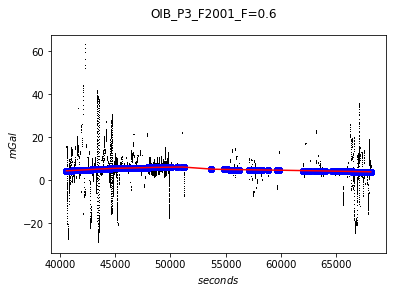

In [52]:
fig, ax = plt.subplots()
plt.plot(x, y, 'k,')
plt.plot(lowess_x, lowess_y, 'bo')
plt.plot(xnew, ynew, 'r-')
ax.set_xlabel('$seconds$')
ax.set_ylabel('$mGal$')
# ax.text(1,1, infile[:12] + '_' + str(my_frac))
plt.suptitle(infile[:12] + '_F=' + str(my_frac))
plt.savefig('figs/' + infile[:12] + '_iMARbias-lowess_F=' + str(my_frac) + '.png')

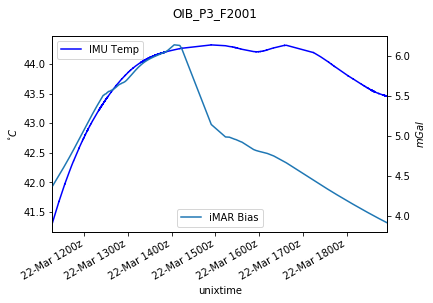

In [53]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
# # For a third trace
# ax2, ax3 = ax.twinx(), ax.twinx()
# rspine = ax3.spines['right']
# rspine.set_position(('axes', 1.25))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
# fig.subplots_adjust(right=0.75)

ax = df['imu_temp_C'].plot(ax=ax, style='b-', label='IMU Temp')
ax.set_ylabel('$^{\circ}C$')
ax.legend(loc="upper left")
ax2 = df['imar_bias_lowess'].plot(ax=ax2, secondary_y=True, label='iMAR Bias')
ax2.set_ylabel('$mGal$')
ax2.set_xlabel('Time (UTC)')
ax2.legend(loc="lower center")
# df['imar_bias'].plot(ax=ax3, style='g-', alpha=0.2)
# plt.legend([ax, ax2],["Temperature", "iMAR bias"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H%Mz'))
fig.autofmt_xdate()
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_iMARbias-vs-IMUtemp.png')

### Shift the IMU temps
First find the offset in peaks (better to do this objectively using CC)

In [54]:
lag_argmax = df['imar_bias_lowess'].argmax() - df['imu_temp_C'].argmax()
print(lag_argmax)

-1 days +23:09:17


Test shifting by max offset

Text(0,0.5,'$^{\\circ}C$')

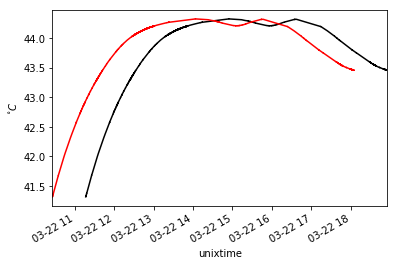

In [55]:
# df['imu_temp_C'].shift(2000).plot(color='blue')
fig, ax = plt.subplots()
df['imu_temp_C'].shift(0).plot(color='black')
df['imu_temp_C'].shift(periods=1, freq=lag_argmax).plot(color='red')
ax.set_ylabel('$^{\circ}C$')


Text(0,0.5,'$mGal$')

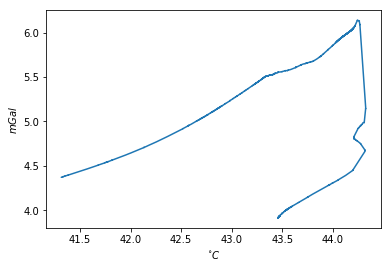

In [56]:
if flight == 1:
    df['imu_temp_C_shift'] = df['imu_temp_C']
elif flight == 4:
    df['imu_temp_C_shift'] = df['imu_temp_C'].shift(periods=1, freq=lag_argmax)
else:
    print("no flight")

# plt.plot(df['imu_temp_C'].shift(periods=1, freq=lag_argmax), df['imar_bias'])
fig, ax = plt.subplots()
plt.plot(df['imu_temp_C_shift'], df['imar_bias_lowess'])
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

Text(0,0.5,'$mGal$')

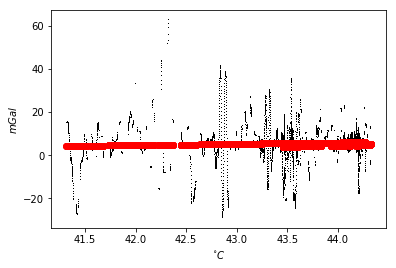

In [57]:
fig, ax = plt.subplots()
plt.plot(df['imu_temp_C'], df['imar_bias'], 'k,')
plt.plot(df['imu_temp_C'], df['imar_bias_lowess'],'ro')
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

Pandas correlation

In [58]:
# df[['imu_temp_C', 'imar_bias']].corr()
print(df.corr()['imar_bias_lowess'].tail())

y                   0.554046
zbias_corr          0.198264
imar_bias           0.142432
imar_bias_lowess    1.000000
imu_temp_C_shift    0.476559
Name: imar_bias_lowess, dtype: float64


## Linear Regression

In [59]:
import statsmodels.formula.api as smf

# result = sm.ols(formula="A ~ B + C", data=df).fit()
ols = smf.ols(formula="imar_bias_lowess ~ imu_temp_C_shift", data=df).fit()
print(ols.summary())
ols.save('ols_results_F200' + str(flight) + '.pickle')

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     1876.
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:12:43   Log-Likelihood:                -6294.2
No. Observations:                6386   AIC:                         1.259e+04
Df Residuals:                    6384   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -15.1880      0.471  

In [60]:
import statsmodels.formula.api as smf

# 2nd order polynomial
poly_2 = smf.ols('imar_bias ~ 1 + imu_temp_C_shift + I(imu_temp_C_shift ** 2.0)', data=df).fit()
print(poly_2.summary())
poly_2.save('poly_2_results_F200' + str(flight) + '.pickle')

                            OLS Regression Results                            
Dep. Variable:              imar_bias   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.199
Date:                Thu, 24 May 2018   Prob (F-statistic):            0.00204
Time:                        16:12:43   Log-Likelihood:                -23472.
No. Observations:                6386   AIC:                         4.695e+04
Df Residuals:                    6383   BIC:                         4.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [61]:
import statsmodels.formula.api as smf

# 2nd order polynomial
poly_3 = smf.ols('imar_bias ~ 1 \
                + imu_temp_C_shift \
                + I(imu_temp_C_shift ** 2.0) \
                + I(imu_temp_C_shift ** 3.0)', 
                 data=df).fit()
print(poly_3.summary())

                            OLS Regression Results                            
Dep. Variable:              imar_bias   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     41.01
Date:                Thu, 24 May 2018   Prob (F-statistic):           3.05e-26
Time:                        16:12:43   Log-Likelihood:                -23418.
No. Observations:                6386   AIC:                         4.684e+04
Df Residuals:                    6382   BIC:                         4.687e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

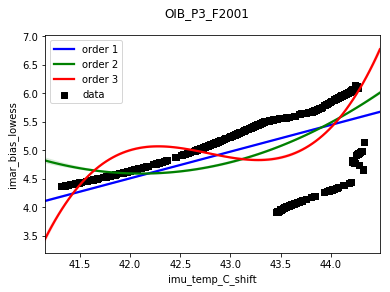

In [62]:
import seaborn as sns
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(df['imu_temp_C_shift'], df['imar_bias_lowess'], label='data', color='black', marker=',')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='imu_temp_C_shift', y='imar_bias_lowess', data=df, 
            order=1, 
            color='blue', scatter=None, label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='imu_temp_C_shift', y='imar_bias_lowess', data=df, 
            order=2, 
            color='green', scatter=None, label='order 2')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='imu_temp_C_shift', y='imar_bias_lowess', data=df, 
            order=3, 
            color='red', scatter=None, label='order 3')
plt.legend()
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_test_regression_order3.png')

## Load OLS results from another flight

In [ ]:
# #
# new_poly = sm.load('poly2_results_650b.pickle')
# new_ols = sm.load('ols_results_650b.pickle')
#
# new_poly = sm.load('poly_2_results_F2004.pickle')
# new_ols = sm.load('ols_results_F2004.pickle')
#
new_poly = sm.load('poly_2_results_OIB-P3_ALL.pickle')
new_ols = sm.load('ols_results_OIB-P3_ALL.pickle')
#
print(new_ols.model.formula)
print(new_poly.model.formula)
print(new_ols.summary())

6386


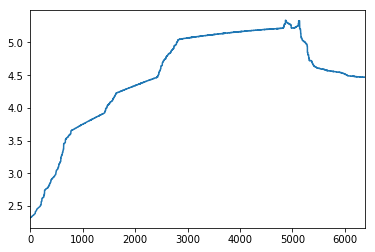

In [84]:
correction = new_ols.predict(pd.DataFrame({'intercept': 1,
                             'imu_temp_C': df['imu_temp_C_shift'].values}))
df['imar_adjusted_o2'] = df['grav_4_70_corr'] - correction.values
print(len(correction))
correction.plot()

In [79]:
# correction = ols.predict(pd.DataFrame({'intercept': 1,
#                              'imu_temp_C_shift': df['imu_temp_C_shift'].values}))
# df['imar_adjusted_o2'] = df['grav_4_70_corr'] - correction.values
# print(len(correction))
# correction.plot()

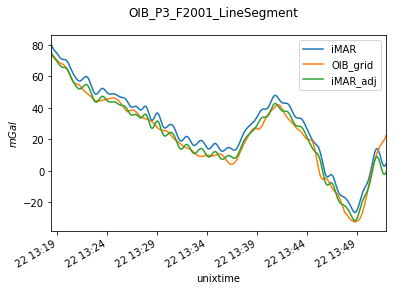

In [80]:
fig, ax = plt.subplots()
ln1 = df['grav_4_70_corr'].loc[begin_line: end_line].plot(label='iMAR')
ln2 = df['oib_10_11_12'].loc[begin_line: end_line].plot(label='OIB_grid')
ln3 = df['imar_adjusted_o2'].loc[begin_line: end_line].plot(label='iMAR_adj')
ax.set_ylabel('$mGal$')
plt.legend()
plt.suptitle(infile[:12] + '_LineSegment')
plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB_LineSegment.png')

In [69]:
df['imar_bias_new'] = df['imar_adjusted_o2'] - df['oib_10_11_12']
df[['imar_bias_new', 'imar_bias']].describe()

,imar_bias_new,imar_bias
count,6386.000000,6386.000000
mean,-0.470125,4.728347
std,9.552554,9.561111
min,-34.021312,-29.111326
25%,-3.253257,2.008001
50%,-0.016252,5.234017
75%,3.038406,8.386180
max,58.011721,62.669098


/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


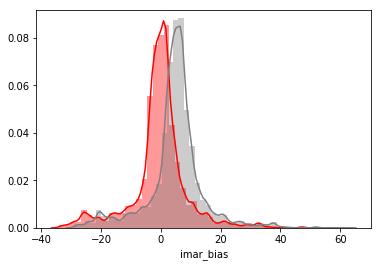

In [72]:

# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
ax = sns.distplot(df['imar_bias_new'], kde=True, color='red')
ax = sns.distplot(df['imar_bias'], kde=True, color='grey')